Epoch 1/10
1824/1824 - 3s - loss: 0.0287 - 3s/epoch - 2ms/step
Epoch 2/10
1824/1824 - 2s - loss: 5.5771e-04 - 2s/epoch - 845us/step
Epoch 3/10
1824/1824 - 2s - loss: 2.5838e-04 - 2s/epoch - 830us/step
Epoch 4/10
1824/1824 - 1s - loss: 2.3593e-04 - 1s/epoch - 821us/step
Epoch 5/10
1824/1824 - 2s - loss: 2.1440e-04 - 2s/epoch - 829us/step
Epoch 6/10
1824/1824 - 2s - loss: 2.0558e-04 - 2s/epoch - 1ms/step
Epoch 7/10
1824/1824 - 2s - loss: 2.0034e-04 - 2s/epoch - 957us/step
Epoch 8/10
1824/1824 - 2s - loss: 1.9425e-04 - 2s/epoch - 1ms/step
Epoch 9/10
1824/1824 - 2s - loss: 1.9223e-04 - 2s/epoch - 919us/step
Epoch 10/10
1824/1824 - 2s - loss: 1.9595e-04 - 2s/epoch - 893us/step
loss function: mse
1824/1824 - 1s - loss: 1.8645e-04 - 1s/epoch - 718us/step
train loss:	 0.0001864463120000437


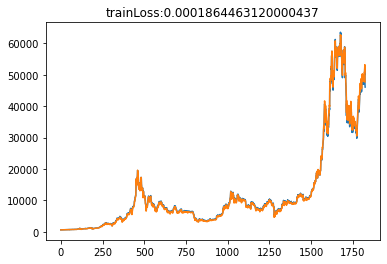

In [15]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from keras.models import Sequential, load_model
from sklearn.preprocessing import MinMaxScaler
import tensorboard
# dataframe = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/1预测模型/data/price_cleaned.xlsx')
# dataset_bitcoin = dataframe['value'].values[:,1].reshape(-1,1)
# dataset_gold = dataframe['usdpm'].values[:,1].reshape(-1,1)
dataframe = pd.read_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/1预测模型/data/LSTM-Prediction/price_pred.xlsx')
dataset_bitcoin = dataframe['value'].values.reshape(-1,1)
dataset_gold = dataframe['usdpm'].values.reshape(-1,1)
# dataset = dataset_gold.copy()
dataset = dataset_bitcoin.copy()
# print(dataset)
# 将整型变为float
dataset = dataset.astype('float32')
# 归一化数据
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# 划分训练集和测试集
train_size = int(len(dataset) * 1.0)
trainlist = dataset[:train_size]

# 创建数据集
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)

trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))



# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)
model.save(os.path.join("DATA","LSTM_GOLD" + "_final.h5"))
# make predictions
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)

 
# 评估
print('loss function: mse')
train_loss = model.evaluate(trainX,trainY,batch_size=1, verbose=2)

print('train loss:\t', train_loss)



#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)



# 画画
# plt.subplot(1,2,1)
plt.plot(trainY)
plt.plot(trainPredict[1:])
plt.title('trainLoss:'+str(train_loss))
plt.show()





In [17]:

trainY_t = numpy.zeros(len(dataset)).reshape(-1,1)
trainY_t[2:] = trainPredict
dataframe['bitcoin_pred']=trainY_t
dataframe.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/1预测模型/data/LSTM-Prediction/price_pred.xlsx')

In [19]:
# dataframe.keys()
# dataframe = dataframe.drop('Unnamed: 0',axis=1)
# dataframe = dataframe.drop('Unnamed: 0.1',axis=1)
# dataframe.keys()
dateframe = dataframe.drop('gold_bitcoin',1)
dataframe.to_excel('/Users/kuzaowuwei/Desktop/2022美赛/赛中数据/1预测模型/data/LSTM-Prediction/price_pred.xlsx')

/var/folders/4y/vhq70vv92tx2gszq5_00sgjr0000gn/T/ipykernel_91647/124150548.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dateframe = dataframe.drop('gold_bitcoin',1)


In [8]:
dataframe.keys()


Index(['Unnamed: 0', 'date', 'value', 't', 'usdpm', '_merge', 'bitcoin_pred',
       'gold_pred'],
      dtype='object')

In [10]:
trainY_t = numpy.zeros(len(dataset)).reshape(-1,1)
trainY_t[2:] = trainPredict

In [12]:
trainY_t.shape

(1826, 1)